# Modelo Lineal con Tensorflow y Jupyter(Caso Básico)

In [2]:

%lsmagic
#https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.OgvXVkU
#https://data-flair.training/blogs/tensorflow-mnist-dataset/

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
# Import MNIST
from tensorflow.examples.tutorials.mnist import input_data

display(Math(r'\sqrt{a^2 + b^2}')) ## Quería ver como se pone una formula 


<IPython.core.display.Math object>

In [4]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# El parámetro one_hot=True se usa para que en vez de que el valor de salida sea un 2, lo que saldrá es un modelo con 
# variables dummy . Ejemplo: 0,0,1,0,0,0,....

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

type(mnist)



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


tensorflow.contrib.learn.python.learn.datasets.base.Datasets

## Inicialización de variables

1) En tensor flow placeholder es un tipo de variable  se usa para esos elementos que no hay que entrenar como los datos de entrenamiento.
2) El valor de los pixeles será un valor entero.
3) 28x28= 784 pixeles por una cantidad variable de filas
4) Los pesos W y la constante B las inicializamos en zeros usando tf.zeros(dimensiones de la matriz)
5) Matriz de pesos a encontrar. Esta es una variable y por eso no puede ser del tipo tf.placeholder, sino que tiene que ser tipo variable para que se entienda que esta es la variable a optimizar

In [142]:
display(Math(r'y\_=W*x +B')) ## Asi se obtiene el valor de salida estimado

x=tf.placeholder(tf.float32, [None, 784]) # 784 pixeles. Es la matriz de imagenes
y_=tf.placeholder(tf.float32, [None, 10])  # 10 números. Es la matriz de resultados que queremos predecir
W=tf.Variable(tf.zeros([784,10])) # Matriz de pesos a encontrar. Esta es una variable y por eso no puede ser del tipo
## tf.placeholder, sino que tiene que ser tipo variable para que se entienda que esta es la variable a optimizar
B= tf.Variable(tf.zeros([1,10])) # Está es la constante o sesgo del perceptron

<IPython.core.display.Math object>

Ahora definimos la forma en que vamos a definir la variable de respuesta o salida del modelo usando la tangente 
hiperbólica.
tf.matmut se usa para multiplicar matrices. Si no se usa generara error porque x*W es una multiplicación de 
matrices punto a punto y eso solo funciona si las matrices son del mismo tamaño

In [143]:
display(Math(r'y=tanh(W*x)+B')) ## Asi se vería el valor de salida real

y=tf.nn.tanh(tf.matmul(x,W)+B)

<IPython.core.display.Math object>

Ahora calulamos el error usando el mse

In [144]:
display(Math(r'mse=sum(y- y\_)^2/(n-1)'))
mse= tf.reduce_mean(tf.square(y-y_))


<IPython.core.display.Math object>

Ahora vamos a minimizar la función de error (mse). Vamos a usar gradiente descendiente
velocidad aprendizaje= 0.1


In [145]:
train_step= tf.train.GradientDescentOptimizer(0.01).minimize(mse)

Vamos a inicializar las variables de tensor flow e inicializar una sesión de Tensorflow. Lo hice con un try-except

In [146]:
try : 
    init=tf.global_variables_initializer()
    session= tf.Session()
    session.run(init)
    writer = tf.summary.FileWriter('./graphs', session.graph)
except ValueError:
    print("la función tf.initialize_all_variables es obsoleta")

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Son 150 interacciones de entrenamiento. Como entrenar sobre todos los datos de training es muy costoso. 
Se va a usar Stocastic Gradient Descent El cual coge estocásticamente una submuestra de datos y con ello 
se entrena. Para eso se usa la función mnist.train.next_batch

In [147]:
train_loss=[]
test_loss=[]

for i in range(150):
    batchX, batchY= mnist.train.next_batch(1000) # Toma de a 1000 imagenes de forma aleatoria
    session.run(train_step,feed_dict={x:batchX, y_:batchY}) #feed_dict es un diccionario con los datos de entrenamiento
    loss_train=session.run(mse,feed_dict={x:batchX, y_:batchY})
    #loss_test=session.run(mse,feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    loss_test=session.run(mse,feed_dict={x:X_test, y_:Y_test})
    train_loss.append(loss_train) # calcula el error sobre datos de training
    test_loss.append(loss_test) #calcula error en los datos de testing
    
print('Terminó el entrenamiento con Gradiente descendente Estocástico')

Terminó el entrenamiento con Gradiente descendente Estocástico


Vamos a graficar para ver si el modelo aprendió algo

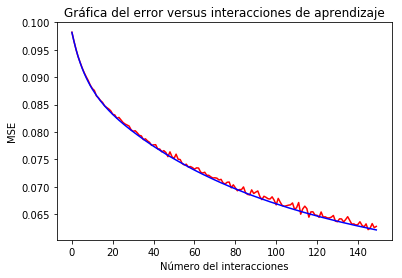

In [148]:
plt.plot(train_loss, color='red')
plt.plot(test_loss, color='blue')
plt.title('Gráfica del error versus interacciones de aprendizaje')
plt.xlabel('Número del interacciones')
plt.ylabel('MSE')
plt.show()

Se está entrenando muy bien. Vamos ahora a calcular la tasa de acierto del sistema= El porcentaje de efectividad de nuestro modelo

In [149]:
pred= session.run(y,feed_dict={x: mnist.test.images, y:mnist.test.labels})

np.argmax es una función que recuperá el indice de la neurona con la probabilidad más alta la cual es la que más 
se exitó

In [156]:
errors=0. ## se usa el punto(.) para que no lo tome como entero
for i in range(pred.shape[0]):
    if(np.argmax(pred[i])!=np.argmax(mnist.test.labels[i])):
        errors=errors+1

In [158]:
print('Test Error= ', str(errors/pred.shape[0]))

Test Error=  0.0


Ahora vamos a visualizar cada imagen y eso wignifica recuperar la matriz W que tiene 10 columnas. 
Va a ser necesario hacer un reshape para que quede de 28x28.


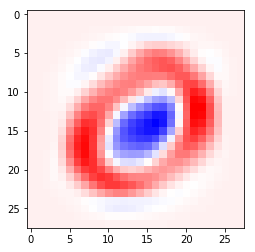

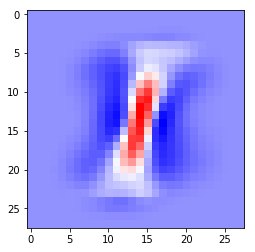

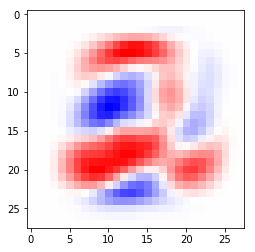

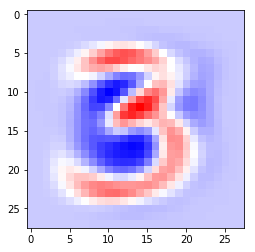

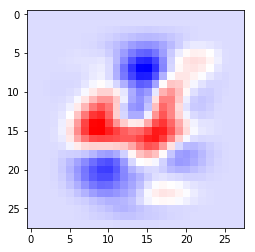

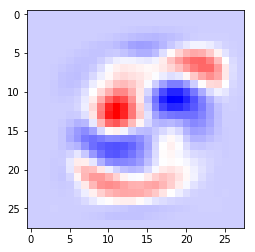

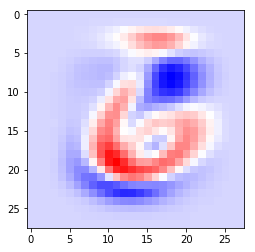

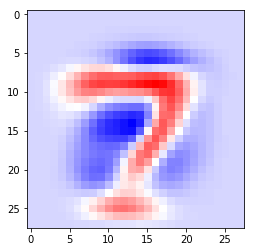

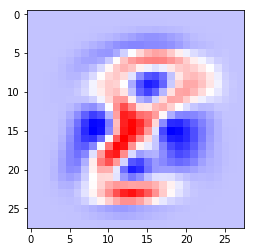

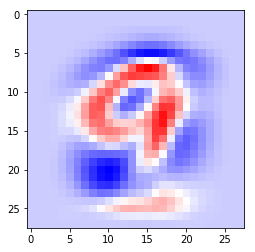

In [169]:
my_W= session.run(W)
for i in range(my_W.shape[1]):
    plt.imshow(my_W[:,i].reshape(28,28), cmap='bwr')#cmap=color map bwr=blue,white,red
    plt.show()
    